<a href="https://colab.research.google.com/github/layannadelgado/projetos-de-analise-de-dados/blob/main/Projeto_filmes_Disney_Hulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura dos arquivos coletados

In [2]:
df_disney = pd.read_csv("/content/disney_plus_titles.csv")
df_hulu = pd.read_csv("/content/hulu_titles.csv")

## Conhecendo os Dados

In [3]:
df_disney.head() # Visualizar os primeiras linhas do dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [4]:
df_hulu.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [5]:
df_disney.info()   # Conhecer os valores não nulos e tipos de dados por coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [6]:
df_hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


In [7]:
df_disney.describe()  # Visualizar as estatísticas do dataframe

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [8]:
df_hulu.describe()

,cast,release_year
count,0.0,3073.000000
mean,NaN,2012.567524
std,NaN,10.844069
min,NaN,1923.000000
25%,NaN,2010.000000
50%,NaN,2016.000000
75%,NaN,2019.000000
max,NaN,2021.000000


## Limpeza e Tratamento dos dados

In [9]:
df_disney = df_disney.rename(columns= {"show_id":"id","type":"tipo","title":"título","director":"diretor","cast":"elenco","country":"país","date_added":"data_adicionada","release_year":"ano_de_lancamento","rating":"classificação","duration":"duracao","listed_in":"categoria","description":"descricao"})

df_hulu = df_hulu.rename(columns= {"show_id":"id","type":"tipo","title":"título","director":"diretor","cast":"elenco","country":"país","date_added":"data_adicionada","release_year":"ano_de_lancamento","rating":"classificação","duration":"duracao","listed_in":"categoria","description":"descricao"})


# Todos as colunas renomeadas

In [10]:
df_disney.duplicated().sum()    # Verificar se há dados duplicadas

np.int64(0)

In [11]:
df_hulu.duplicated().sum()

np.int64(0)

In [12]:
df_disney.isnull().sum()   # Verificar se há dados nulos

,0
id,0
tipo,0
título,0
diretor,473
elenco,190
país,219
data_adicionada,3
ano_de_lancamento,0
classificação,3
duracao,0


In [13]:
df_hulu.isnull().sum()

,0
id,0
tipo,0
título,0
diretor,3070
elenco,3073
país,1453
data_adicionada,28
ano_de_lancamento,0
classificação,520
duracao,479


In [14]:
df_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1450 non-null   object
 1   tipo               1450 non-null   object
 2   título             1450 non-null   object
 3   diretor            977 non-null    object
 4   elenco             1260 non-null   object
 5   país               1231 non-null   object
 6   data_adicionada    1447 non-null   object
 7   ano_de_lancamento  1450 non-null   int64 
 8   classificação      1447 non-null   object
 9   duracao            1450 non-null   object
 10  categoria          1450 non-null   object
 11  descricao          1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [15]:
df_hulu

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [16]:
df_hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3073 non-null   object 
 1   tipo               3073 non-null   object 
 2   título             3073 non-null   object 
 3   diretor            3 non-null      object 
 4   elenco             0 non-null      float64
 5   país               1620 non-null   object 
 6   data_adicionada    3045 non-null   object 
 7   ano_de_lancamento  3073 non-null   int64  
 8   classificação      2553 non-null   object 
 9   duracao            2594 non-null   object 
 10  categoria          3073 non-null   object 
 11  descricao          3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


In [17]:
df_disney["data_adicionada"] = pd.to_datetime(df_disney["data_adicionada"], format="%B %d, %Y", errors='coerce')    # Tratando a coluna de data. Utilizei pd.to_datetime(errors='coerce') para  converter os valores vazios de tempo em Nat.
df_hulu["data_adicionada"] = pd.to_datetime(df_hulu["data_adicionada"], format="%B %d, %Y", errors='coerce')

In [18]:
df_disney["data_adicionada"].isnull().sum()  # Verificando se teve algum valor convertido incorretamente.

np.int64(3)

In [19]:
df_disney[df_disney["data_adicionada"].isnull()]     # Visualizando as colunas

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
1439,s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaT,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaT,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1441,s1442,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaT,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [20]:
df_hulu["data_adicionada"].isnull().sum()

np.int64(28)

In [21]:
df_hulu[df_hulu["data_adicionada"].isnull()]

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
3045,s3046,TV Show,Angel,NaN,NaN,United States,NaT,1999,TV-14,5 Seasons,"Action, Adventure, Drama","Joss Whedon, the creator and executive produce..."
3046,s3047,TV Show,Arrested Development,NaN,NaN,United States,NaT,2003,TV-14,3 Seasons,"Comedy, Sitcom","In this critically acclaimed series, Michael B..."
3047,s3048,TV Show,Black Butler: Book of Circus,NaN,NaN,Japan,NaT,2014,TV-14,1 Season,"Action, Adventure, Anime",When children begin to vanish after the arriva...
3048,s3049,TV Show,Blade Dance of the Elementalers,NaN,NaN,Japan,NaT,2014,TV-14,1 Season,"Action, Adventure, Anime",The prestigious Areishia Spirit Academy has tr...
3049,s3050,TV Show,Boys Before Flowers,NaN,NaN,South Korea,NaT,2009,TV-14,1 Season,"Comedy, Drama, International",Boys Over Flowers is one of the biggest Korean...
3050,s3051,TV Show,Buffy the Vampire Slayer,NaN,NaN,United States,NaT,1997,TV-PG,7 Seasons,"Drama, Science Fiction, Teen",Buffy the Vampire Slayer is a comedy-action se...
3051,s3052,TV Show,Doctora Juguetes,NaN,NaN,NaN,NaT,2012,TV-Y,1 Season,"Kids, Latino",Una mágica serie animada acerca de Doc McStuff...
3052,s3053,TV Show,Firefly,NaN,NaN,United States,NaT,2002,TV-PG,1 Season,"Action, Adventure, Science Fiction",The Crew of a starship travel through outer sp...
3053,s3054,TV Show,Frasier,NaN,NaN,United States,NaT,1993,TV-PG,11 Seasons,"Comedy, Sitcom","Comedy series set in Seattle, WA, which chroni..."
3054,s3055,TV Show,Hey Arnold!,NaN,NaN,United States,NaT,1996,TV-Y,5 Seasons,"Cartoons, Comedy, Family",Football-headed Arnold lives with his offbeat ...


In [22]:
df_hulu.describe()

,elenco,data_adicionada,ano_de_lancamento
count,0.0,3045,3073.000000
mean,NaN,2019-10-31 21:07:51.724137984,2012.567524
min,NaN,2006-07-14 00:00:00,1923.000000
25%,NaN,2019-01-28 00:00:00,2010.000000
50%,NaN,2020-07-11 00:00:00,2016.000000
75%,NaN,2021-04-29 00:00:00,2019.000000
max,NaN,2021-10-24 00:00:00,2021.000000
std,NaN,NaN,10.844069


In [23]:
df_hulu["data_adicionada"] = df_hulu["data_adicionada"].fillna(df_hulu["data_adicionada"].mean())  # preenchendo os valores nulos da coluna com a média

In [24]:
df_disney["data_adicionada"] = df_disney["data_adicionada"].fillna(df_disney["data_adicionada"].mean())

In [25]:
df_hulu["data_adicionada"].isnull().sum()

np.int64(0)

In [26]:
df_disney["data_adicionada"].isnull().sum()

np.int64(0)

In [27]:
df_disney["data_adicionada"] = df_disney["data_adicionada"].dt.date      # Garantindo que os valores sejam do tipo data
df_hulu["data_adicionada"] = df_hulu["data_adicionada"].dt.date


In [28]:
df_disney["duracao"] = df_disney["duracao"].str.replace(" min","")
df_disney["duracao"] = df_disney["duracao"].str.replace(" Seasons","")
df_disney["duracao"] = df_disney["duracao"].str.replace(" Season","")   # Tirando o min (de minuto) e  Seasons (temporada) da coluna duração para deixar apenas numeros e para posteriomente classificar a coluna para o tipo int.


df_hulu["duracao"] = df_hulu["duracao"].str.replace(" min","")
df_hulu["duracao"] = df_hulu["duracao"].str.replace(" Seasons","")
df_hulu["duracao"] = df_hulu["duracao"].str.replace(" Season","")

In [29]:
df_hulu.isnull().sum()

,0
id,0
tipo,0
título,0
diretor,3070
elenco,3073
país,1453
data_adicionada,0
ano_de_lancamento,0
classificação,520
duracao,479


In [30]:
df_hulu[(df_hulu["tipo"] == "Movie") & (df_hulu["duracao"].isnull())]   # Investigando os valores nulos

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,2021-10-24,2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
12,s13,Movie,Out of the Shadows: The Man Behind the Steele ...,NaN,NaN,NaN,2021-10-18,2021,NaN,NaN,News,George Stephanopoulos sits down with former MI...
15,s16,Movie,Showtime Championship Boxing: Lopez vs. Salido...,NaN,NaN,NaN,2021-10-16,2011,NaN,NaN,Sports,Juan Manuel Lopez vs. Orlando Salido for the W...
37,s38,Movie,BELLATOR MMA: Kongo vs. Johnson 2,NaN,NaN,NaN,2021-10-13,2020,NaN,NaN,Sports,Cheick Kongo vs. Tim Johnson battle in a histo...
40,s41,Movie,In the Crease,NaN,NaN,NaN,2021-10-13,2020,NaN,NaN,Sports,Post-game analysis and highlight show airing e...
...,...,...,...,...,...,...,...,...,...,...,...,...
2951,s2952,Movie,All Saints (1998),NaN,NaN,Australia,2014-02-19,1998,12 Seasons,NaN,"Drama, International",All Saints is an Australian medical drama focu...
2955,s2956,Movie,Getting On,NaN,NaN,United Kingdom,2014-01-07,2009,3 Seasons,NaN,"Comedy, International, Sitcom",Care for the elderly is the least glamorous ar...
2958,s2959,Movie,(Sub) Ninja Scroll,NaN,NaN,Japan,2013-12-15,1993,93 min,NaN,"Action, Adult Animation, Adventure",When Jubei saves a young ninja woman from the ...
2959,s2960,Movie,Packed to the Rafters,NaN,NaN,Australia,2013-12-03,2008,6 Seasons,NaN,"Comedy, Drama, International",Packed to the Rafters is an Australian family-...


In [31]:
df_hulu[(df_hulu["duracao"].isnull()) & (df_hulu["país"].isnull())]

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,2021-10-24,2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
12,s13,Movie,Out of the Shadows: The Man Behind the Steele ...,NaN,NaN,NaN,2021-10-18,2021,NaN,NaN,News,George Stephanopoulos sits down with former MI...
15,s16,Movie,Showtime Championship Boxing: Lopez vs. Salido...,NaN,NaN,NaN,2021-10-16,2011,NaN,NaN,Sports,Juan Manuel Lopez vs. Orlando Salido for the W...
37,s38,Movie,BELLATOR MMA: Kongo vs. Johnson 2,NaN,NaN,NaN,2021-10-13,2020,NaN,NaN,Sports,Cheick Kongo vs. Tim Johnson battle in a histo...
40,s41,Movie,In the Crease,NaN,NaN,NaN,2021-10-13,2020,NaN,NaN,Sports,Post-game analysis and highlight show airing e...
...,...,...,...,...,...,...,...,...,...,...,...,...
2537,s2538,Movie,Indy 500,NaN,NaN,NaN,2018-03-02,2018,TV-G,NaN,Sports,Indianapolis 500 On Demand: Relive all of the ...
2539,s2540,Movie,Classic Boxing,NaN,NaN,NaN,2018-02-28,2018,TV-PG,NaN,Sports,Sit ringside for hundreds of the most legendar...
2540,s2541,Movie,ESPN Films Presents,NaN,NaN,NaN,2018-02-27,2009,TV-G,NaN,"Documentaries, Sports",ESPN Films produces films covering sports-rela...
2541,s2542,Movie,O.J.: Made in America,NaN,NaN,NaN,2018-02-27,2016,TV-14,NaN,"Crime, Documentaries, Mystery",It is the defining cultural tale of modern Ame...


In [32]:
df_hulu[df_hulu["país"].notnull()]                # Visualizando as colunas não nulas

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
9,s10,TV Show,The Bachelorette,NaN,NaN,United States,2021-10-20,2003,TV-14,3,"Reality, Romance",ABC's romance reality show lets one lucky lady...
17,s18,TV Show,America's Book of Secrets,NaN,NaN,United States,2021-10-15,2012,TV-14,1,"Documentaries, History",America's story can be told in many ways. Whil...
19,s20,TV Show,Beyond Scared Straight,NaN,NaN,United States,2021-10-15,2011,TV-14,6,"Documentaries, Reality, Teen",Beyond Scared Straight profiles the new approa...
21,s22,TV Show,Hoarders,NaN,NaN,United States,2021-10-15,2009,TV-PG,7,"Health & Wellness, Lifestyle & Culture, Reality",Each 60-minute episode of Hoarders is a fascin...
22,s23,TV Show,Little Women: Atlanta,NaN,NaN,United States,2021-10-15,2016,TV-14,2,"Black Stories, Reality","In Little Women: Atlanta, the little ladies tu..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,2019-10-31,1966,TV-PG,3,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,2019-10-31,1997,TV-PG,7,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,2019-10-31,2011,TV-14,1,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,2019-10-31,1959,TV-PG,5,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [33]:
df_disney["duracao"] = df_disney["duracao"].astype(float)    # Alterei os valores para o tipo inteiro (Deixei do tipo float por causa do colunas nulas)
df_hulu["duracao"] = df_hulu["duracao"].astype(float)

In [34]:
df_hulu["duracao"] = df_hulu["duracao"].fillna(df_hulu["duracao"].mean())   # Tratei as colunas nulas de duração preenchendo com a média (eram 479)

In [35]:
df_disney["duracao"] = df_disney["duracao"].astype(int)    # Garantindo que os valores sejam do tipo inteiro
df_hulu["duracao"] = df_hulu["duracao"].astype(int)

In [36]:
df_hulu = df_hulu.drop(columns=["elenco"])  # Excluindo a coluna elenco

In [37]:
df_hulu.isnull().sum()

,0
id,0
tipo,0
título,0
diretor,3070
país,1453
data_adicionada,0
ano_de_lancamento,0
classificação,520
duracao,0
categoria,0


In [38]:
df_disney.duplicated().sum()

np.int64(0)

In [39]:
df_hulu.duplicated().sum()

np.int64(0)

## Criando um dataframe somente com Filmes

In [40]:
df_disney_filmes = df_disney[df_disney["tipo"] == "Movie"]
df_hulu_filmes = df_hulu[df_hulu["tipo"] == "Movie"]

In [105]:
df_disney_filmes

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...,...,...,...
1444,s1445,Movie,Ice Age: Dawn Of The Dinosaurs,Carlos Saldanha,"Ray Romano, John Leguizamo, Denis Leary, Simon...","United States, United Kingdom, Australia",2021-06-04,2009,PG,97,"Animation, Comedy, Family",Our prehistoric pals visit a world inhabited b...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."


In [41]:
df_hulu_filmes.isnull().sum()    # Verificando os nulos

,0
id,0
tipo,0
título,0
diretor,1481
país,823
data_adicionada,0
ano_de_lancamento,0
classificação,290
duracao,0
categoria,0


In [42]:
df_disney_filmes.isnull().sum()

,0
id,0
tipo,0
título,0
diretor,75
elenco,119
país,106
data_adicionada,0
ano_de_lancamento,0
classificação,1
duracao,0


In [43]:
df_hulu_filmes.info()                   # Verificando os tipos dos dados

<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, 0 to 2993
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1484 non-null   object
 1   tipo               1484 non-null   object
 2   título             1484 non-null   object
 3   diretor            3 non-null      object
 4   país               661 non-null    object
 5   data_adicionada    1484 non-null   object
 6   ano_de_lancamento  1484 non-null   int64 
 7   classificação      1194 non-null   object
 8   duracao            1484 non-null   int64 
 9   categoria          1484 non-null   object
 10  descricao          1481 non-null   object
dtypes: int64(2), object(9)
memory usage: 139.1+ KB


In [44]:
df_disney_filmes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1052 non-null   object
 1   tipo               1052 non-null   object
 2   título             1052 non-null   object
 3   diretor            977 non-null    object
 4   elenco             933 non-null    object
 5   país               946 non-null    object
 6   data_adicionada    1052 non-null   object
 7   ano_de_lancamento  1052 non-null   int64 
 8   classificação      1051 non-null   object
 9   duracao            1052 non-null   int64 
 10  categoria          1052 non-null   object
 11  descricao          1052 non-null   object
dtypes: int64(2), object(10)
memory usage: 106.8+ KB


In [45]:
df_disney_filmes.duplicated().sum()           # Visualizando as duplicadas

np.int64(0)

In [46]:
df_hulu_filmes.duplicated().sum()

np.int64(0)

In [47]:
df_hulu_filmes.describe()

,ano_de_lancamento,duracao
count,1484.000000,1484.000000
mean,2012.607143,79.136792
std,12.142055,32.757381
min,1923.000000,1.000000
25%,2012.000000,39.000000
50%,2017.000000,89.000000
75%,2019.000000,103.000000
max,2021.000000,192.000000


In [48]:
df_disney_filmes.describe()

,ano_de_lancamento,duracao
count,1052.000000,1052.000000
mean,1999.230989,71.910646
std,23.858584,40.595585
min,1928.000000,1.000000
25%,1994.000000,44.000000
50%,2008.000000,85.000000
75%,2017.000000,98.000000
max,2021.000000,183.000000


In [49]:
df_disney_filmes[df_disney_filmes["duracao"] == 183]    #Inveestigando duração com até 5 min

                                                    # Trailes

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
1039,s1040,Movie,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",United States,2019-11-12,2019,PG-13,183,"Action-Adventure, Fantasy, Science Fiction","The epic finale to the Infinity Saga, this dra..."


In [50]:
df_hulu_filmes[df_hulu_filmes["duracao"] == 192]

,id,tipo,título,diretor,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
297,s298,Movie,Stephen King's It,NaN,NaN,2021-09-01,1990,NaN,192,"Drama, Horror, Mystery","In 1960, seven preteen outcasts fight an evil ..."


In [51]:
df_disney_filmes = df_disney_filmes[df_disney_filmes["duracao"] > 10]     #Retirando os valores maiores que 5 da coluna duração do dataframe

In [52]:
df_hulu_filmes = df_hulu_filmes[df_hulu_filmes["duracao"] > 10]

## União dos dataset

In [53]:
# df_concatenado = pd.concat([df_hulu_filmes, df_disney_filmes], ignore_index=True)

In [54]:
# df_concatenado.duplicated().sum()

In [55]:
# df_concatenado.shape[0]

##Outliers

In [56]:
Q1_d = df_disney_filmes["duracao"].quantile(0.25)                                    # Utilizando o método IQR para identificar o outlier Disney
Q3_d = df_disney_filmes["duracao"].quantile(0.75)

print(Q1_d)
print(Q3_d)

73.0
102.0


In [57]:
IQR_d = Q3_d - Q1_d
print(IQR_d)

29.0


In [58]:
outliers_disney = df_disney_filmes[
    (df_disney_filmes["duracao"] < (Q1_d - 1.5 * IQR_d)) |
    (df_disney_filmes["duracao"] > (Q3_d + 1.5 * IQR_d))
]

In [59]:
outliers_disney

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
21,s22,Movie,Frozen Fever,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Jonathan Groff, Jo...",United States,2021-11-12,2015,G,11,"Animation, Family, Fantasy",Elsa wants to give Anna the best birthday part...
26,s27,Movie,Marvel Studios’ 2021 Disney+ Day Special,NaN,NaN,NaN,2021-11-12,2021,TV-PG,14,Movies,Marvel Studios’ Disney+ Day Special explores t...
40,s41,Movie,Under the Helmet: The Legacy of Boba Fett,NaN,NaN,NaN,2021-11-12,2021,TV-PG,22,Science Fiction,A special celebrating the origins and legacy o...
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,s1268,Movie,The Chronicles of Narnia: Prince Caspian,Andrew Adamson,"Georgie Henley, Skandar Keynes, William Mosele...","United States, Poland, Slovenia, Czech Republi...",2019-11-12,2008,PG,154,"Action-Adventure, Family, Fantasy",The Pevensie siblings return to lead the Narni...
1268,s1269,Movie,"The Chronicles of Narnia: The Lion, the Witch ...",Andrew Adamson,"Georgie Henley, Skandar Keynes, William Mosele...","United Kingdom, United States",2019-11-12,2005,PG,147,"Action-Adventure, Family, Fantasy",Four siblings enter a magical land and help it...
1280,s1281,Movie,The Golden Touch,Walt Disney,NaN,United States,2019-11-12,1935,TV-Y7,11,"Animation, Family, Fantasy",A fable of a king whose touch turns everything...
1339,s1340,Movie,The Sound of Music,Robert Wise,"Julie Andrews, Christopher Plummer, Richard Ha...",United States,2019-11-12,1965,G,175,"Biographical, Family, Historical",A governess wins the hearts of many and leads ...


In [60]:
Q1_h = df_hulu_filmes["duracao"].quantile(0.25)                                    # Utilizando o método IQR para identificar o outlier Hulu
Q3_h = df_hulu_filmes["duracao"].quantile(0.75)

print(Q1_h)
print(Q3_h)

39.0
103.0


In [61]:
IQR_h = Q3_h - Q1_h
print(IQR_h)

64.0


In [62]:
outliers_hulu = df_hulu_filmes[
    (df_hulu_filmes["duracao"] < (Q1_h - 1.5 * IQR_h)) |
    (df_hulu_filmes["duracao"] > (Q3_h + 1.5 * IQR_h))
]

In [63]:
outliers_hulu

,id,tipo,título,diretor,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao


In [64]:
disney_filmes_tratados = df_disney_filmes[
    ( df_disney_filmes["duracao"] >= (Q1_d - 1.5 * IQR_d)) &
    ( df_disney_filmes["duracao"] <= (Q3_d + 1.5 * IQR_d))
]


In [65]:
hulu_filmes_tratados = df_hulu_filmes[
    (df_hulu_filmes["duracao"] >= (Q1_h - 1.5 * IQR_h)) &
    (df_hulu_filmes["duracao"] <= (Q3_h + 1.5 * IQR_h))
]

In [66]:
disney_filmes_tratados

,id,tipo,título,diretor,elenco,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94,"Biographical, Documentary",An inside look at the legendary life of advent...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...
10,s11,Movie,Adventure Thru the Walt Disney Archives,John Gleim,"Don Hahn, Kathryn Beaumont, Pete Docter, Kevin...",NaN,2021-11-19,2020,TV-PG,59,Documentary,Explore the treasures and rich history of the ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1444,s1445,Movie,Ice Age: Dawn Of The Dinosaurs,Carlos Saldanha,"Ray Romano, John Leguizamo, Denis Leary, Simon...","United States, United Kingdom, Australia",2021-06-04,2009,PG,97,"Animation, Comedy, Family",Our prehistoric pals visit a world inhabited b...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."


In [67]:
hulu_filmes_tratados

,id,tipo,título,diretor,país,data_adicionada,ano_de_lancamento,classificação,duracao,categoria,descricao
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,2021-10-24,2021,TV-MA,39,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,2021-10-23,2020,NaN,94,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,2021-10-23,2021,PG-13,108,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,2021-10-22,2021,R,97,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,2021-10-22,2021,NaN,104,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
...,...,...,...,...,...,...,...,...,...,...,...
2955,s2956,Movie,Getting On,NaN,United Kingdom,2014-01-07,2009,3 Seasons,39,"Comedy, International, Sitcom",Care for the elderly is the least glamorous ar...
2958,s2959,Movie,(Sub) Ninja Scroll,NaN,Japan,2013-12-15,1993,93 min,39,"Action, Adult Animation, Adventure",When Jubei saves a young ninja woman from the ...
2959,s2960,Movie,Packed to the Rafters,NaN,Australia,2013-12-03,2008,6 Seasons,39,"Comedy, Drama, International",Packed to the Rafters is an Australian family-...
2982,s2983,Movie,(Sub) Legend of Heroes: Trails in the Sky,NaN,NaN,2013-08-31,2011,PG-13,84,"Anime, International, Science Fiction","Ten years ago, an invasion by the Erebonians a..."


In [68]:
hulu_filmes_tratados.describe()

,ano_de_lancamento,duracao
count,1473.000000,1473.000000
mean,2012.564834,79.696538
std,12.177359,32.229659
min,1923.000000,23.000000
25%,2012.000000,39.000000
50%,2017.000000,90.000000
75%,2019.000000,103.000000
max,2021.000000,192.000000


In [69]:
disney_filmes_tratados.describe()

,ano_de_lancamento,duracao
count,805.000000,805.000000
mean,2002.658385,87.842236
std,18.024412,24.651374
min,1937.000000,30.000000
25%,1997.000000,78.000000
50%,2007.000000,90.000000
75%,2016.000000,102.000000
max,2021.000000,145.000000


In [70]:
disney_filmes_tratados.duplicated().sum()

np.int64(0)

In [71]:
hulu_filmes_tratados.duplicated().sum()

np.int64(0)

In [72]:
hulu_filmes_tratados["duracao"].median()

90.0

In [73]:
disney_filmes_tratados["duracao"].median()

90.0

In [74]:
# df_diver_categoria = disney_filmes.groupby(["ano_de_lancamento", "país", "categoria"]).size().reset_index(name="quantidade_titulos")      #Agrupando os dados por ano de lançamento e país

## Agrupamento

In [83]:
disney_genero_ano = disney_filmes_tratados.groupby("ano_de_lancamento") ["categoria"].nunique().reset_index(name="quantidade_titulos")
hulu_genero_ano = hulu_filmes_tratados.groupby("ano_de_lancamento") ["categoria"].nunique().reset_index(name="quantidade_titulos")

In [106]:
disney_explodido = df_disney_filmes.assign(país=df_disney_filmes["país"].str.split(", "))      # Separando os países por vírgula
hulu_explodido = df_hulu_filmes.assign(país=df_hulu_filmes["país"].str.split(", "))

In [107]:
disney_explodido = disney_explodido.explode("país")         # Transformando listas de países em linhas separadas
hulu_explodido = hulu_explodido.explode("país")

In [92]:
# disney_genero_pais = disney_filmes_tratados.groupby("país") ["categoria"].nunique().reset_index(name="quantidade_titulos")
# hulu_genero_pais = hulu_filmes_tratados.groupby("país") ["categoria"].nunique().reset_index(name="quantidade_titulos")

In [120]:
disney_genero_pais =disney_explodido.groupby("país").size().reset_index(name="quantidade_titulos")
hulu_genero_pais =hulu_explodido.groupby("país").size().reset_index(name="quantidade_titulos")

In [93]:
hulu_genero_pais

,país,quantidade_titulos
0,"Afghanistan, United States",1
1,Australia,12
2,"Australia, United Arab Emirates",1
3,"Australia, United Kingdom",1
4,"Australia, United States",1
...,...,...
127,"United States, United Kingdom, Australia",1
128,"United States, United Kingdom, Australia, Canada",1
129,"United States, United Kingdom, France",1
130,"United States, United Kingdom, Germany, Canada",1


In [86]:
hulu_genero_ano

,ano_de_lancamento,quantidade_titulos
0,1923,1
1,1950,3
2,1951,1
3,1953,3
4,1954,1
...,...,...
63,2017,52
64,2018,71
65,2019,92
66,2020,80


In [85]:
disney_genero_ano

,ano_de_lancamento,quantidade_titulos
0,1937,1
1,1940,2
2,1941,1
3,1942,1
4,1943,1
...,...,...
75,2017,21
76,2018,19
77,2019,24
78,2020,31


## Visualizando a distribuição

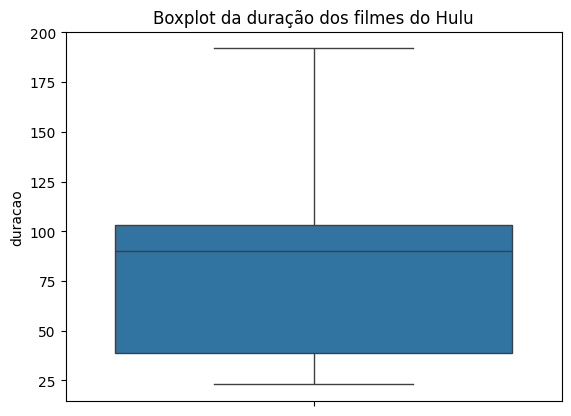

In [77]:
sns.boxplot(hulu_filmes_tratados['duracao'])               ## Análise exploratória de dados por meio do boxplot
plt.title("Boxplot da duração dos filmes do Hulu")         ## Observando a distribuição dos dados em torno da mediana, a dispersão e a presença de outliers.
plt.show()


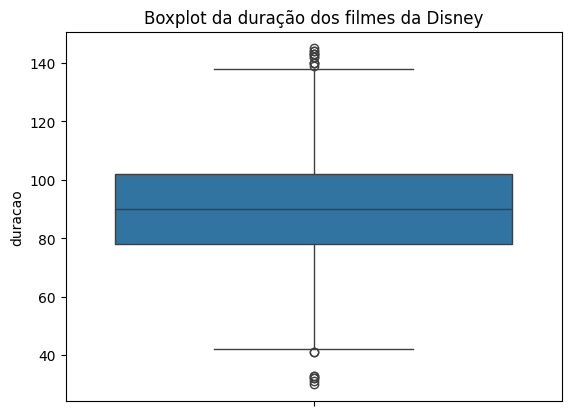

In [78]:
sns.boxplot(disney_filmes_tratados['duracao'])
plt.title("Boxplot da duração dos filmes da Disney")
plt.show()                                                               ## Criando um boxplot

## Gáficos

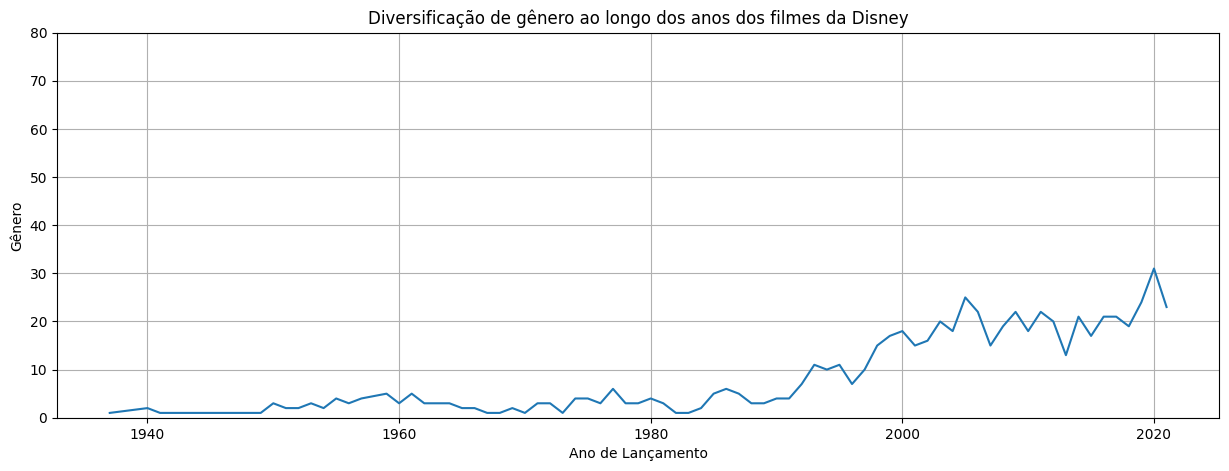

In [91]:
plt.figure(figsize=(15, 5))
sns.lineplot(
    data= disney_genero_ano,
    x= "ano_de_lancamento",
    y= "quantidade_titulos",

  )

plt.xlabel("Ano de Lançamento")
plt.ylabel('Gênero')
plt.title("Diversificação de gênero ao longo dos anos dos filmes da Disney")

# plt.xticks(rotation=45)
plt.ylim(0, 80)
plt.grid(True)
plt.show()


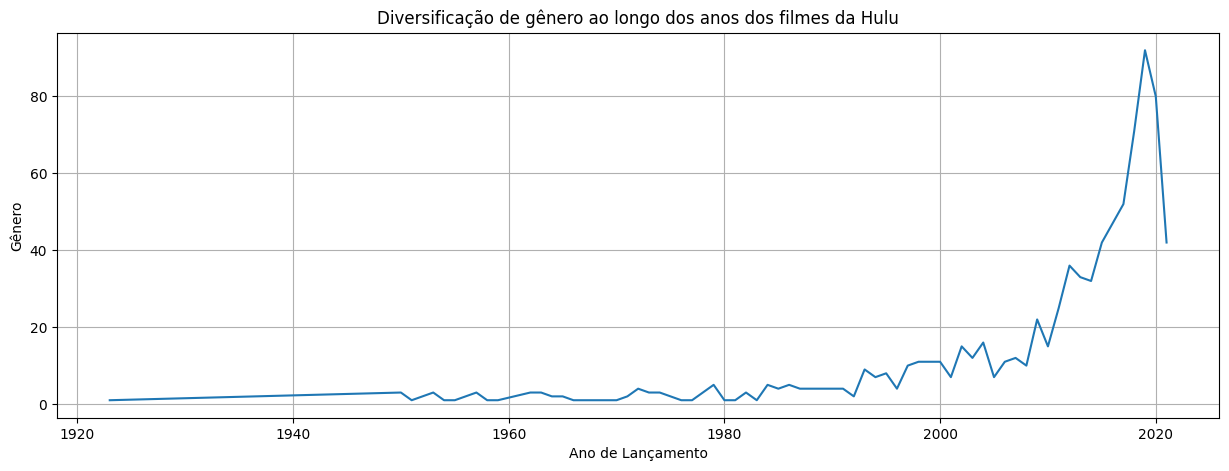

In [90]:
plt.figure(figsize=(15, 5))
sns.lineplot(
    data= hulu_genero_ano,
    x= "ano_de_lancamento",
    y= "quantidade_titulos",

  )

for i in range(hulu_genero_ano.shape[0]):
    ano = hulu_genero_ano["ano_de_lancamento"].iloc[i]
    qtd = hulu_genero_ano["quantidade_generos"].iloc[i]
    plt.text(ano, qtd + 0.2, str(qtd), ha='center', va='bottom', fontsize=9)




plt.xlabel("Ano de Lançamento")
plt.ylabel('Gênero')
plt.title("Diversificação de gênero ao longo dos anos dos filmes da Hulu")

# plt.xticks(rotation=45)
plt.grid(True)
plt.show()


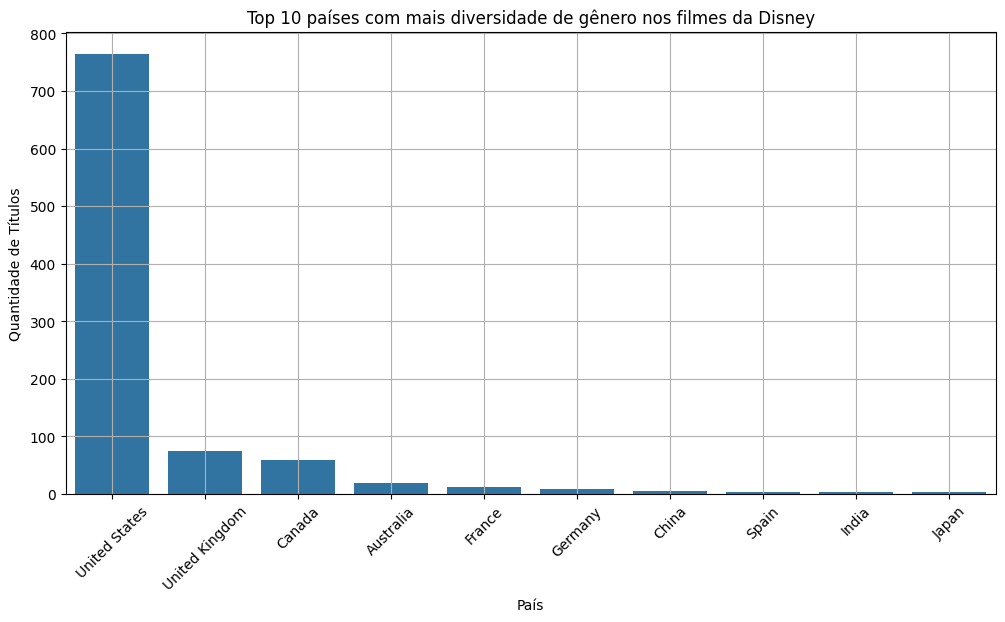

In [133]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=disney_genero_pais.sort_values("quantidade_titulos", ascending=False).head(10),
    y="quantidade_titulos",
    x="país",
    # palette="Blues_d"
)

plt.xticks(rotation=45)
plt.title("Top 10 países com mais diversidade de gênero nos filmes da Disney")
plt.xlabel("País")
plt.ylabel("Quantidade de Títulos")
plt.grid(True)
plt.show()


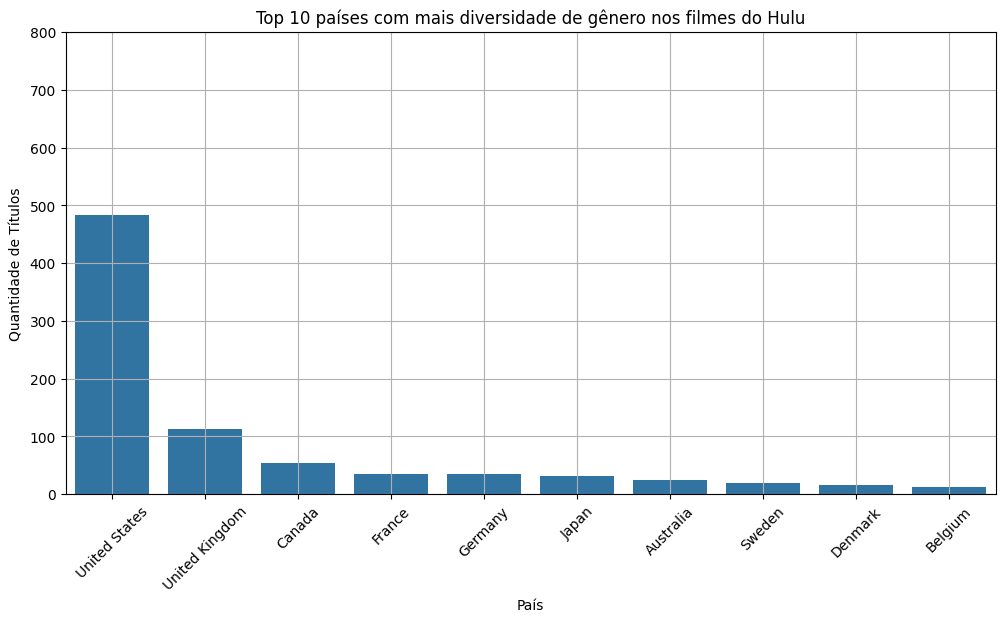

In [134]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=hulu_genero_pais.sort_values("quantidade_titulos", ascending=False).head(10),
    y="quantidade_titulos",
    x="país",
    # palette="Blues_d"
)

plt.xticks(rotation=45)
plt.ylim(0, 800)
plt.title("Top 10 países com mais diversidade de gênero nos filmes do Hulu")
plt.xlabel("País")
plt.ylabel("Quantidade de Títulos")
plt.grid(True)
plt.show()

In [126]:
correlacao_disney = disney_filmes_tratados['ano_de_lancamento'].corr(disney_filmes_tratados['duracao'])        # verificando a correlação entre o ano de lançamento e a duração
correlacao_hulu = hulu_filmes_tratados['ano_de_lancamento'].corr(disney_filmes_tratados['duracao'])

In [124]:
correlacao_disney

np.float64(-0.050614320300656275)

In [127]:
correlacao_hulu

np.float64(0.026163364157239532)

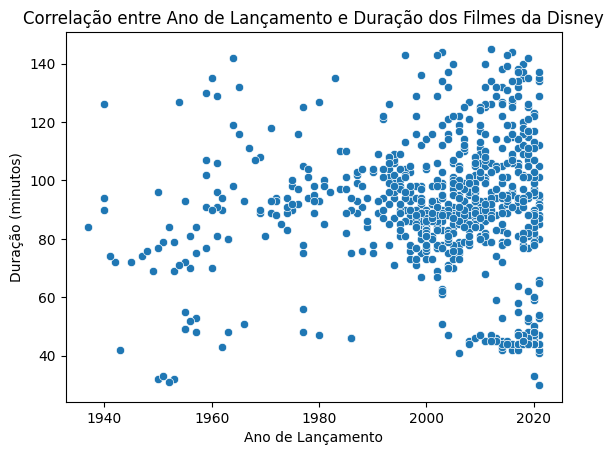

In [129]:
sns.scatterplot(x='ano_de_lancamento', y='duracao', data=disney_filmes_tratados)
plt.title('Correlação entre Ano de Lançamento e Duração dos Filmes da Disney')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.show()

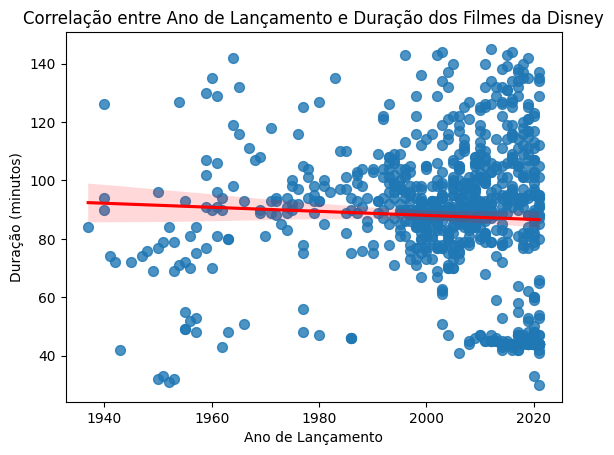

In [136]:
sns.regplot(x='ano_de_lancamento', y='duracao', data=disney_filmes_tratados, scatter_kws={'s': 50}, line_kws={'color': 'red'})       # Visualizando com a linha de tendência
plt.title('Correlação entre Ano de Lançamento e Duração dos Filmes da Disney')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.show()

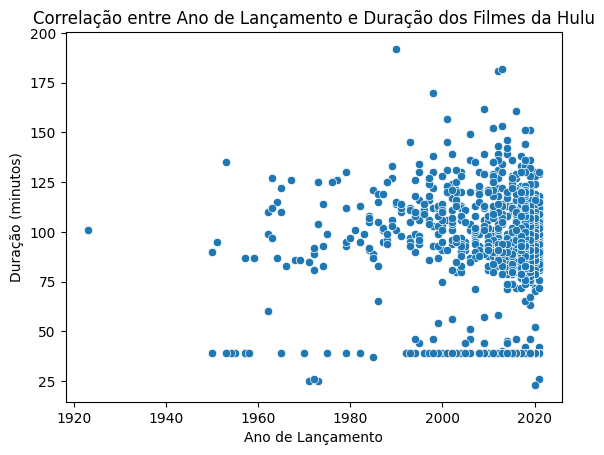

In [130]:
sns.scatterplot(x='ano_de_lancamento', y='duracao', data=hulu_filmes_tratados)
plt.title('Correlação entre Ano de Lançamento e Duração dos Filmes da Hulu')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.show()

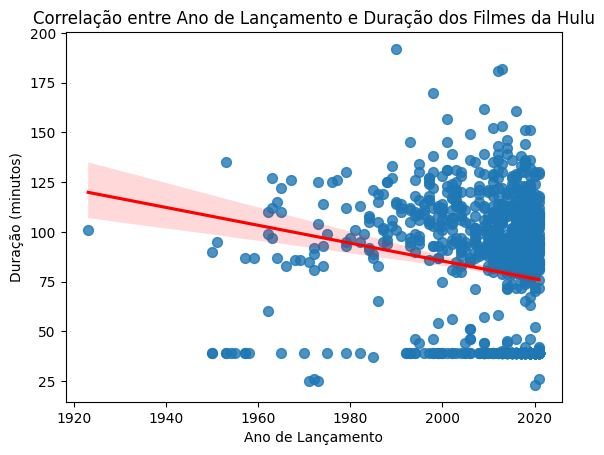

In [135]:
sns.regplot(x='ano_de_lancamento', y='duracao', data=hulu_filmes_tratados, scatter_kws={'s': 50}, line_kws={'color': 'red'})        # Visualizando com a linha de tendência
plt.title('Correlação entre Ano de Lançamento e Duração dos Filmes da Hulu')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.show()